<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://covidtracking.com/api

In [2]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-24 00:29:15.797192


In [4]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [5]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200723,AK,2684.0,186825.0,NaN,36.0,NaN,NaN,NaN,1.0,NaN,787.0,A,7/23/2020 00:00,2020-07-23T00:00:00Z,07/22 20:00,19.0,NaN,2020-07-23T00:00:00Z,189509.0,NaN,NaN,2684.0,19.0,NaN,02,65,4111,189509,189509,4176,189509,0,0,250b2f86b7f497e40057c76c9c34280febdd150b,0,0,0,0,0,
1,20200723,AL,74212.0,545315.0,NaN,1547.0,8995.0,NaN,1043.0,NaN,553.0,32510.0,B,7/23/2020 11:00,2020-07-23T11:00:00Z,07/23 07:00,1397.0,8995.0,2020-07-23T11:00:00Z,618011.0,NaN,NaN,72696.0,1357.0,40.0,01,2399,7640,619527,619527,10039,619527,33,457,29d01db66f27c6d51adb56e6fe0e730c9efce112,0,0,0,0,0,
2,20200723,AR,36259.0,410221.0,NaN,480.0,2361.0,NaN,NaN,107.0,329.0,28864.0,A+,7/23/2020 14:46,2020-07-23T14:46:00Z,07/23 10:46,386.0,2361.0,2020-07-23T14:46:00Z,445467.0,NaN,NaN,36259.0,NaN,NaN,05,1013,5241,446480,446480,6254,446480,6,44,dbee50032803a8275442e649c5d7c1c659ea6d99,0,0,0,0,0,
3,20200723,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,7/16/2020 00:00,2020-07-16T00:00:00Z,07/15 20:00,0.0,NaN,2020-07-16T00:00:00Z,NaN,NaN,NaN,0.0,NaN,NaN,60,0,0,1037,1037,0,1037,0,0,3ef0986f4a9bd86467f99f1466dc940a8b200448,0,0,0,0,0,
4,20200723,AZ,152944.0,669769.0,NaN,2966.0,7236.0,851.0,NaN,617.0,NaN,19737.0,A+,7/23/2020 00:00,2020-07-23T00:00:00Z,07/22 20:00,3063.0,7236.0,2020-07-23T00:00:00Z,822713.0,NaN,NaN,137710.0,2431.0,152.0,04,2335,6397,822713,822713,8732,822713,89,189,89539b155cdc8809714a9813d2e19c537faba932,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,
7853,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,
7854,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,
7855,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,


In [7]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
37,20200723,NY,409697.0,4958641.0,NaN,706.0,89995.0,160.0,NaN,93.0,NaN,72466.0,A,7/22/2020 23:59,2020-07-22T23:59:00Z,07/22 19:59,25081.0,89995.0,2020-07-22T23:59:00Z,NaN,NaN,NaN,409697.0,NaN,NaN,36,811,68887,5368338,5368338,69698,5368338,13,0,9f959ea5bfa04d2e19be36d33bc75c5fd7c3dd34,0,0,0,0,0,
93,20200722,NY,408886.0,4889754.0,NaN,714.0,89995.0,179.0,NaN,96.0,NaN,72386.0,A,7/21/2020 23:59,2020-07-21T23:59:00Z,07/21 19:59,25068.0,89995.0,2020-07-21T23:59:00Z,NaN,NaN,NaN,408886.0,NaN,NaN,36,705,66954,5298640,5298640,67659,5298640,10,0,1c4050d0e507d38717c106df8ccdec78cf975d33,0,0,0,0,0,
149,20200721,NY,408181.0,4822800.0,NaN,724.0,89995.0,163.0,NaN,91.0,NaN,72302.0,A,7/20/2020 23:59,2020-07-20T23:59:00Z,07/20 19:59,25058.0,89995.0,2020-07-20T23:59:00Z,NaN,NaN,NaN,408181.0,NaN,NaN,36,855,65314,5230981,5230981,66169,5230981,2,0,f0c81740e063ec93c0416fb03d7339a17997ffda,0,0,0,0,0,
205,20200720,NY,407326.0,4757486.0,NaN,716.0,89995.0,158.0,NaN,93.0,NaN,72229.0,A,7/19/2020 23:59,2020-07-19T23:59:00Z,07/19 19:59,25056.0,89995.0,2020-07-19T23:59:00Z,NaN,NaN,NaN,407326.0,NaN,NaN,36,519,48823,5164812,5164812,49342,5164812,8,0,6a23ba7c888ceb65d6ab223b83dbbd4dcf1783a9,0,0,0,0,0,
261,20200719,NY,406807.0,4708663.0,NaN,722.0,89995.0,160.0,NaN,96.0,NaN,72161.0,A,7/18/2020 23:59,2020-07-18T23:59:00Z,07/18 19:59,25048.0,89995.0,2020-07-18T23:59:00Z,NaN,NaN,NaN,406807.0,NaN,NaN,36,502,45702,5115470,5115470,46204,5115470,13,0,f5135cc3e99c0f6e2231509ab89c7814c66e35fa,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,36,29,0,197,197,29,197,0,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,
7717,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,36,43,0,404,168,43,168,0,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,
7757,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,36,11,16,361,125,27,125,0,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,
7784,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,36,16,28,122,98,44,98,0,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,


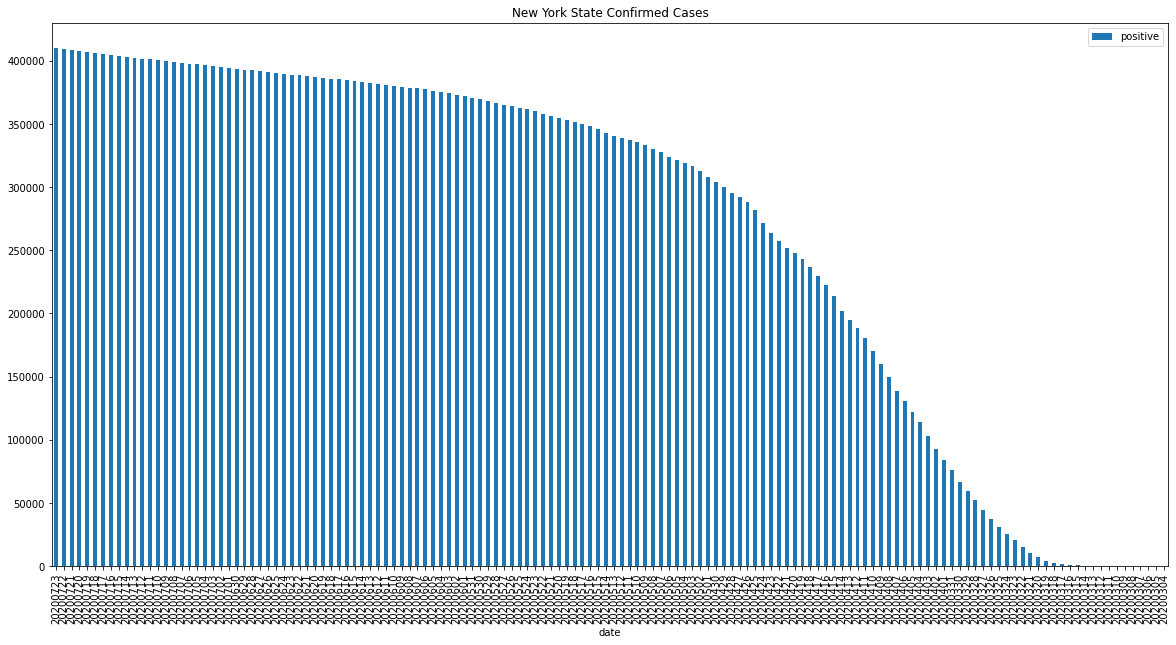

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar', title='New York State Confirmed Cases', figsize=(20,10))